# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

In [1]:
import pandas as pd  
import numpy as np

In [2]:
file1 = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv')
display(file1.head(5))
file1.shape

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


(4008, 11)

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [3]:
# Firstly I want to drop the duplicates. I did this straight away because I saw the table had lots of empty rows at the end
# I should reset the indexs but I actually do that later. I learned the hard way that you need to do this step when creating the model
file1 = file1.drop_duplicates()
file1.shape

(1072, 11)

In [4]:
file1.columns

Index(['Customer', 'ST', 'GENDER', 'Education', 'Customer Lifetime Value',
       'Income', 'Monthly Premium Auto', 'Number of Open Complaints',
       'Policy Type', 'Vehicle Class', 'Total Claim Amount'],
      dtype='object')

In [5]:
# this code was lifted from L. 1.03 and adapted to update the column names accordingly
cols = []
for column in file1.columns:
    cols.append(column.lower())
cols
file1.columns = cols

# I should have used this, which is more simple than above:  data.rename(columns=str.lower, inplace=True)

# Now to rename the columns to remove the spaces
file1 = file1.rename(columns={'customer lifetime value':'customer_lifetime_value',
                            'monthly premium auto':'monthly_premium_auto', 
                            'number of open complaints':'no_of_open_complaints',
                            'policy type':'policy_type',
                            'vehicle class':'vehicle_class',
                            'total claim amount':'total_claim_amount',
                            'st':'state'})
file1.head()
# Checking that it has worked as intended
file1

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,no_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
1067,VJ51327,Cali,F,High School or Below,2031499.76%,63209.0,102.0,1/2/00,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,323912.47%,16061.0,88.0,1/0/00,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,462680.11%,79487.0,114.0,1/0/00,Special Auto,SUV,547.200000
1070,MY31220,California,F,College,899704.02%,54230.0,112.0,1/0/00,Personal Auto,Two-Door Car,537.600000


## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [6]:
# First assesing the variations for gender column
file1['gender'].unique()
file1['gender'].value_counts()

gender
F         457
M         413
Male       39
female     28
Femal      17
Name: count, dtype: int64

In [7]:
# Lifting this from L. 1.04 

# Define a function to clean the column
def clean(x):
    if x in ['M', 'MALE']:
        return 'Male'
    elif x in ['F', 'female','Femal']:
        return 'Female'
    else:
        return 'U'

file1['gender'] = list(map(clean, file1['gender']))
file1['gender'].unique()  # To check the results again

array(['U', 'Female', 'Male'], dtype=object)

In [8]:
# Checking if it's worked 
file1['gender'].unique()
file1['gender'].value_counts()

gender
Female    502
Male      413
U         157
Name: count, dtype: int64

In [9]:
# State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"
# First need to check the states
file1['state'].value_counts()

state
Oregon        320
California    211
Arizona       186
Cali          120
Nevada         98
Washington     81
WA             30
AZ             25
Name: count, dtype: int64

In [10]:
# Define a function to clean the column
def clean(x):
    if x in ['WA', 'Washington']:
        return 'Washington'
    elif x in ['California', 'Cali']:
        return 'California'
    elif x in ['Arizona', 'AZ']:
        return 'Arizona'
    elif x in ['Oregon']:
        return 'Oregon'
    elif x in ['Nevada']:
        return 'Nevada'    
    else:
        pass

file1['state'] = list(map(clean, file1['state']))
file1['state'].unique()  # To check the results again

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', None],
      dtype=object)

In [11]:
file1['state'].value_counts()

state
California    331
Oregon        320
Arizona       211
Washington    111
Nevada         98
Name: count, dtype: int64

In [12]:
#- *In education, "Bachelors" could be replaced by "Bachelor"*
file1['education'].value_counts()

education
Bachelor                324
College                 313
High School or Below    296
Master                   94
Doctor                   37
Bachelors                 7
Name: count, dtype: int64

In [13]:
file1['education'] = file1['education'].replace('Bachelors', 'Bachelor')
file1['education'].value_counts()

education
Bachelor                331
College                 313
High School or Below    296
Master                   94
Doctor                   37
Name: count, dtype: int64

In [14]:
#- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*
file1['vehicle_class'] = file1['vehicle_class'].replace('Sports Car', 'Luxury')
file1['vehicle_class'] = file1['vehicle_class'].replace('Luxury SUV', 'Luxury')
file1['vehicle_class'] = file1['vehicle_class'].replace('Luxury Car', 'Luxury')

In [15]:
#checking it's worked 
file1['vehicle_class'].value_counts()

vehicle_class
Four-Door Car    576
Two-Door Car     205
SUV              199
Luxury            91
Name: count, dtype: int64

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [16]:
file1.dtypes

customer                    object
state                       object
gender                      object
education                   object
customer_lifetime_value     object
income                     float64
monthly_premium_auto       float64
no_of_open_complaints       object
policy_type                 object
vehicle_class               object
total_claim_amount         float64
dtype: object

In [17]:
# Converting C_L_V to a numberic value and removing the % sign at the same time with this code
file1['customer_lifetime_value'] = pd.to_numeric(file1['customer_lifetime_value'].str.strip('%')).div(100)


In [18]:
# Checking it's worked
file1.dtypes

customer                    object
state                       object
gender                      object
education                   object
customer_lifetime_value    float64
income                     float64
monthly_premium_auto       float64
no_of_open_complaints       object
policy_type                 object
vehicle_class               object
total_claim_amount         float64
dtype: object

In [19]:
# Splitting the complaints column to get the value
file1['no_of_open_complaints'] = file1['no_of_open_complaints'].str.split("/", n=-1, expand=False)

In [20]:
#Getting the middle value from the list and adding it to a new column
def extract_middle_value(x):
    if isinstance(x, list):
        return x[1]
    else:
        return None

file1['clean_complaints'] = file1['no_of_open_complaints'].apply(extract_middle_value)

In [21]:
# checking the data structure of the new column
file1['clean_complaints'].value_counts()

clean_complaints
0    830
1    138
2     50
3     34
4     13
5      6
Name: count, dtype: int64

In [22]:
# Dropping the old  complaints column 
file1 = file1.drop('no_of_open_complaints', axis=1)

In [23]:
# Display the result to check it has worked
display(file1.head(5))
file1.shape

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,policy_type,vehicle_class,total_claim_amount,clean_complaints
0,RB50392,Washington,U,Master,NaN,0.0,1000.0,Personal Auto,Four-Door Car,2.704934,0
1,QZ44356,Arizona,Female,Bachelor,6979.5359,0.0,94.0,Personal Auto,Four-Door Car,1131.464935,0
2,AI49188,Nevada,Female,Bachelor,12887.4317,48767.0,108.0,Personal Auto,Two-Door Car,566.472247,0
3,WW63253,California,Male,Bachelor,7645.8618,0.0,106.0,Corporate Auto,SUV,529.881344,0
4,GA49547,Washington,Male,High School or Below,5363.0765,36357.0,68.0,Personal Auto,Four-Door Car,17.269323,0


(1072, 11)

## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers.

In [24]:
# Checking for empty rows in the data set

In [25]:
empty = file1.isnull().sum()
print(empty)

customer                   1
state                      1
gender                     0
education                  1
customer_lifetime_value    4
income                     1
monthly_premium_auto       1
policy_type                1
vehicle_class              1
total_claim_amount         1
clean_complaints           1
dtype: int64


In [26]:
# Dropping the bottom row because it seems to be empty
file2 = file1.iloc[:-1]

display(file2)
file2.shape

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,policy_type,vehicle_class,total_claim_amount,clean_complaints
0,RB50392,Washington,U,Master,NaN,0.0,1000.0,Personal Auto,Four-Door Car,2.704934,0
1,QZ44356,Arizona,Female,Bachelor,6979.5359,0.0,94.0,Personal Auto,Four-Door Car,1131.464935,0
2,AI49188,Nevada,Female,Bachelor,12887.4317,48767.0,108.0,Personal Auto,Two-Door Car,566.472247,0
3,WW63253,California,Male,Bachelor,7645.8618,0.0,106.0,Corporate Auto,SUV,529.881344,0
4,GA49547,Washington,Male,High School or Below,5363.0765,36357.0,68.0,Personal Auto,Four-Door Car,17.269323,0
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,Male,Master,3059.5503,38644.0,78.0,Personal Auto,Four-Door Car,361.455219,1
1067,VJ51327,California,Female,High School or Below,20314.9976,63209.0,102.0,Personal Auto,SUV,207.320041,2
1068,GS98873,Arizona,Female,Bachelor,3239.1247,16061.0,88.0,Personal Auto,Four-Door Car,633.600000,0
1069,CW49887,California,Female,Master,4626.8011,79487.0,114.0,Special Auto,SUV,547.200000,0


(1071, 11)

In [27]:
# Confirming that dropping the last row has eliminated a lot of the empty values
empty2 = file2.isnull().sum()
print(empty2)

customer                   0
state                      0
gender                     0
education                  0
customer_lifetime_value    3
income                     0
monthly_premium_auto       0
policy_type                0
vehicle_class              0
total_claim_amount         0
clean_complaints           0
dtype: int64


In [28]:
# Dropping the remaining empty values from the CLV column so that we have a clean set and checking that it's worked
file2 = file2.dropna()

display(file2)
file2.shape

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,policy_type,vehicle_class,total_claim_amount,clean_complaints
1,QZ44356,Arizona,Female,Bachelor,6979.5359,0.0,94.0,Personal Auto,Four-Door Car,1131.464935,0
2,AI49188,Nevada,Female,Bachelor,12887.4317,48767.0,108.0,Personal Auto,Two-Door Car,566.472247,0
3,WW63253,California,Male,Bachelor,7645.8618,0.0,106.0,Corporate Auto,SUV,529.881344,0
4,GA49547,Washington,Male,High School or Below,5363.0765,36357.0,68.0,Personal Auto,Four-Door Car,17.269323,0
5,OC83172,Oregon,Female,Bachelor,8256.2978,62902.0,69.0,Personal Auto,Two-Door Car,159.383042,0
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,Male,Master,3059.5503,38644.0,78.0,Personal Auto,Four-Door Car,361.455219,1
1067,VJ51327,California,Female,High School or Below,20314.9976,63209.0,102.0,Personal Auto,SUV,207.320041,2
1068,GS98873,Arizona,Female,Bachelor,3239.1247,16061.0,88.0,Personal Auto,Four-Door Car,633.600000,0
1069,CW49887,California,Female,Master,4626.8011,79487.0,114.0,Special Auto,SUV,547.200000,0


(1068, 11)

## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [29]:
# Have already dropped the duplicates so creating a new clean file for the csv export
clean3 = file2.copy()
print(clean3.shape)

(1068, 11)


In [30]:
display(clean3)

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,policy_type,vehicle_class,total_claim_amount,clean_complaints
1,QZ44356,Arizona,Female,Bachelor,6979.5359,0.0,94.0,Personal Auto,Four-Door Car,1131.464935,0
2,AI49188,Nevada,Female,Bachelor,12887.4317,48767.0,108.0,Personal Auto,Two-Door Car,566.472247,0
3,WW63253,California,Male,Bachelor,7645.8618,0.0,106.0,Corporate Auto,SUV,529.881344,0
4,GA49547,Washington,Male,High School or Below,5363.0765,36357.0,68.0,Personal Auto,Four-Door Car,17.269323,0
5,OC83172,Oregon,Female,Bachelor,8256.2978,62902.0,69.0,Personal Auto,Two-Door Car,159.383042,0
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,Male,Master,3059.5503,38644.0,78.0,Personal Auto,Four-Door Car,361.455219,1
1067,VJ51327,California,Female,High School or Below,20314.9976,63209.0,102.0,Personal Auto,SUV,207.320041,2
1068,GS98873,Arizona,Female,Bachelor,3239.1247,16061.0,88.0,Personal Auto,Four-Door Car,633.600000,0
1069,CW49887,California,Female,Master,4626.8011,79487.0,114.0,Special Auto,SUV,547.200000,0


In [31]:
# Creating a CSV, located in the same folder
clean3.to_csv('clean3.csv', index=False)

# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

# Lab | Customer Analysis Round 3

- Show DataFrame info.
- Describe DataFrame.
- Show a plot of the Gender breakdown.
- Show a plot of Income by State.
- Show a plot of the Policy Type by the Total Claim Amount.
- Show a plot of the Education by Vehicle Class.
- What insights can you establish from these plots?
- What other plots do you feel would be beneficial?

In [32]:
clean3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1068 entries, 1 to 1070
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer                 1068 non-null   object 
 1   state                    1068 non-null   object 
 2   gender                   1068 non-null   object 
 3   education                1068 non-null   object 
 4   customer_lifetime_value  1068 non-null   float64
 5   income                   1068 non-null   float64
 6   monthly_premium_auto     1068 non-null   float64
 7   policy_type              1068 non-null   object 
 8   vehicle_class            1068 non-null   object 
 9   total_claim_amount       1068 non-null   float64
 10  clean_complaints         1068 non-null   object 
dtypes: float64(4), object(7)
memory usage: 100.1+ KB


In [33]:
clean3.describe()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
count,1068.000000,1068.000000,1068.000000,1068.000000
mean,7936.902593,39315.411985,192.691948,405.870113
std,6434.784103,30484.373979,1603.241719,292.917158
min,2004.350700,0.000000,61.000000,0.382107
25%,4034.079950,14072.000000,68.000000,204.071460
50%,5881.742350,36226.000000,82.500000,355.200000
75%,8962.871975,64668.750000,109.250000,532.800000
max,58166.553500,99960.000000,35354.000000,2893.239678


In [34]:
#!pip3 install seaborn if you need to
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

<Axes: xlabel='gender', ylabel='count'>

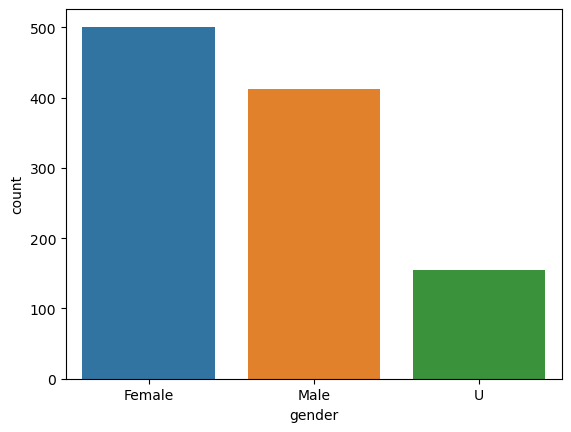

In [35]:
#- Show a plot of the Gender breakdown.
sns.countplot(x='gender', data=clean3,hue='gender')

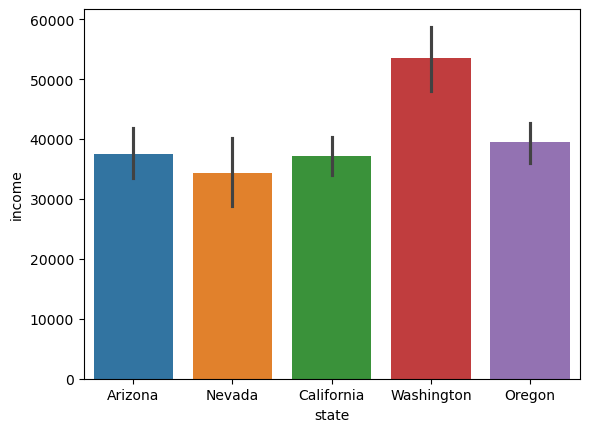

In [36]:
#- Show a plot of income by state
sns.barplot(x = 'state',y='income', data=clean3, hue= 'state')
plt.show()

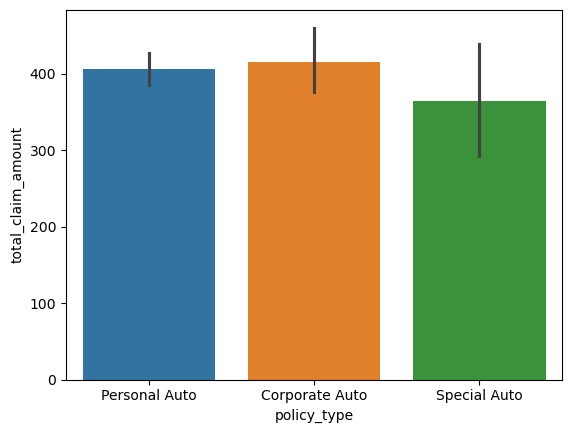

In [37]:
#- Show a plot of the Policy Type by the Total Claim Amount.
sns.barplot(x = 'policy_type',y='total_claim_amount', data=clean3, hue = 'policy_type')
plt.show()

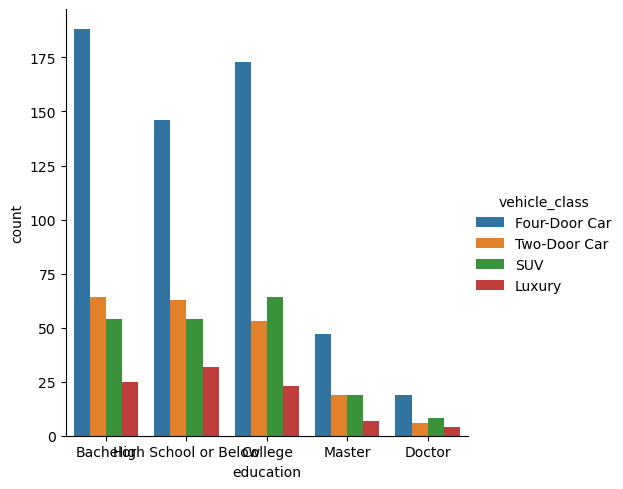

In [38]:
#- Show a plot of the Education by Vehicle Class.
#sns.scatterplot(x=clean3['education'], y=clean3['vehicle_class'])
#sns.barplot(x = 'education',y='vehicle_class', data=clean3)
#sns.boxplot(x = 'education',y='vehicle_class', data=clean3)
#sns.histplot(clean3['education'], bins=50)
sns.catplot(x="education", hue="vehicle_class", kind="count",data=clean3)
# Assume a correlation matrix would be useful but non numeric data
#doing an additional analysis by creating a cohort and seeing what percentage of the cohort has a vehicle type would be better, rather than raw numbers here. 
plt.show()

**What insights can you establish from these plots?**
- More females than males in data set (and percentage would be easy to work out)
- In the data set, people in Washington have the highest income and Nevada the lowest
- Coporoate Auto has the highest claim amount but the claims are broadly similar, differing by less than 10% of each other

**What other plots do you feel would be beneficial?**
- Vehicle class and claim amount likely to have a strong correlation
- Gender claim and income, to see if a gender has a higher claim bias or if it's more income related
- Lifetime value based on multiple data points; gender, state, policy type. This is very high value data, effectively ROI.


-------------------

# Lab | Customer Analysis Round 4


Complete the following task:
- Check the data types of the columns.
- Get the numeric data into a dataframe called numerical and categorical columns in a dataframe called categorical. (You can use np.number and object to select the numerical data types and categorical data types respectively)
**Now we will try to check the normality of the numerical variables visually** 
- Use seaborn library to construct distribution plots for the numerical variables
- Use Matplotlib to construct histograms
- Do the distributions for different numerical variables look like a normal distribution?
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
- Drop one of the two features that show a high correlation between them (greater than 0.9).
- Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [39]:
clean3.dtypes

customer                    object
state                       object
gender                      object
education                   object
customer_lifetime_value    float64
income                     float64
monthly_premium_auto       float64
policy_type                 object
vehicle_class               object
total_claim_amount         float64
clean_complaints            object
dtype: object

In [40]:
#Creating the numerical dataframe
numerical = clean3[['customer_lifetime_value','income','monthly_premium_auto','total_claim_amount','clean_complaints']].copy()
numerical
#or display(numerical.head(5))

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount,clean_complaints
1,6979.5359,0.0,94.0,1131.464935,0
2,12887.4317,48767.0,108.0,566.472247,0
3,7645.8618,0.0,106.0,529.881344,0
4,5363.0765,36357.0,68.0,17.269323,0
5,8256.2978,62902.0,69.0,159.383042,0
...,...,...,...,...,...
1066,3059.5503,38644.0,78.0,361.455219,1
1067,20314.9976,63209.0,102.0,207.320041,2
1068,3239.1247,16061.0,88.0,633.600000,0
1069,4626.8011,79487.0,114.0,547.200000,0


In [41]:
#Creating the categorical dataframe
categorical = clean3[['customer','state', 'gender','education', 'policy_type','vehicle_class']].copy()  
categorical 
#or display(categorical.head(5))

,customer,state,gender,education,policy_type,vehicle_class
1,QZ44356,Arizona,Female,Bachelor,Personal Auto,Four-Door Car
2,AI49188,Nevada,Female,Bachelor,Personal Auto,Two-Door Car
3,WW63253,California,Male,Bachelor,Corporate Auto,SUV
4,GA49547,Washington,Male,High School or Below,Personal Auto,Four-Door Car
5,OC83172,Oregon,Female,Bachelor,Personal Auto,Two-Door Car
...,...,...,...,...,...,...
1066,TM65736,Oregon,Male,Master,Personal Auto,Four-Door Car
1067,VJ51327,California,Female,High School or Below,Personal Auto,SUV
1068,GS98873,Arizona,Female,Bachelor,Personal Auto,Four-Door Car
1069,CW49887,California,Female,Master,Special Auto,SUV


In [42]:
# You should have done this, it would have been easier. I will refer to these tables instead from now on. 
nums = clean3.select_dtypes(include = np.number)
cats = clean3.select_dtypes(include = object)

- Use seaborn library to construct distribution plots for the numerical variables
- Use Matplotlib to construct histograms

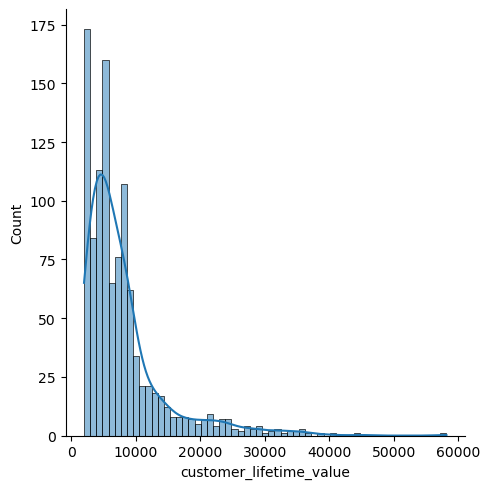

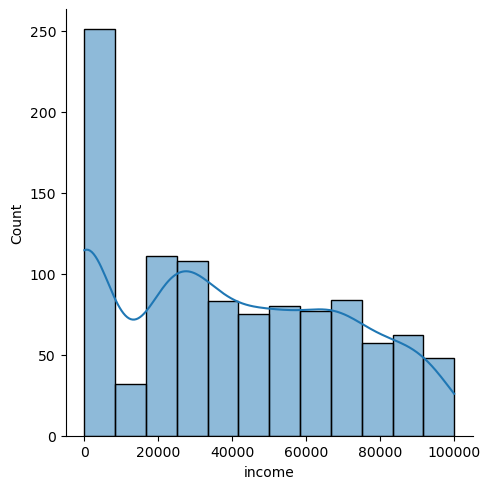

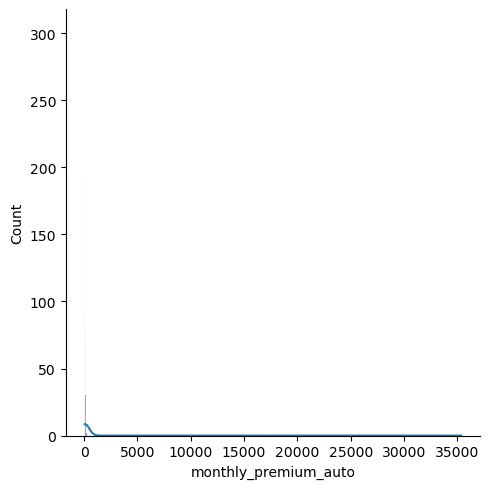

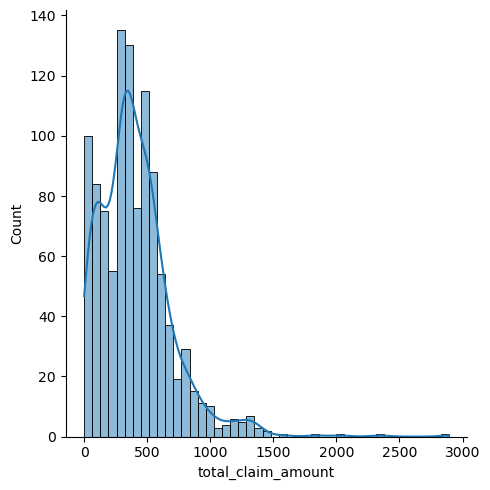

In [43]:
for column in nums.columns:
    sns.displot(nums[column],kde=True)
    plt.show()

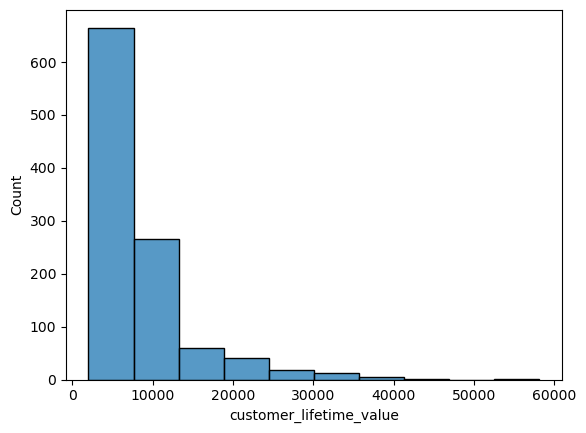

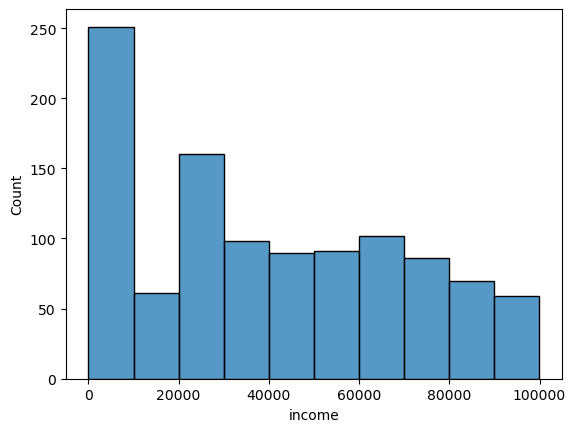

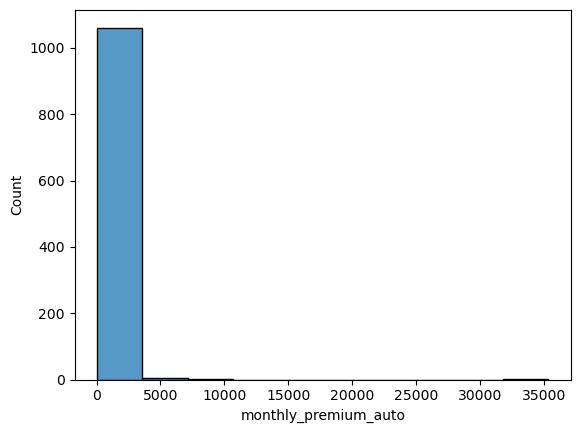

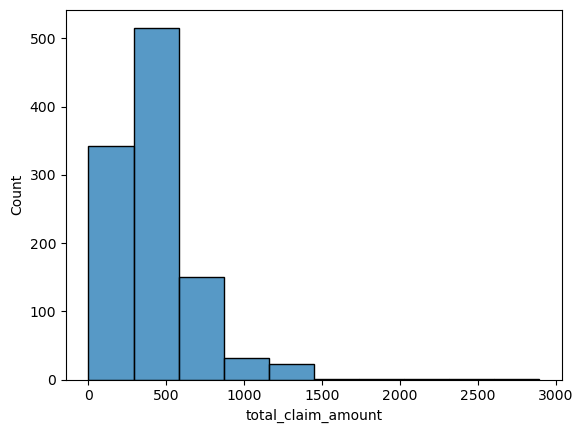

In [44]:
for column in nums.columns:
    sns.histplot(nums[column], bins=10)
    plt.show()

**Do the distributions for different numerical variables look like a normal distribution?**
- Mostly yes, except for monthly premium auto. There it has a really long tail that we should likely remove - most entries condensed at start.

- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

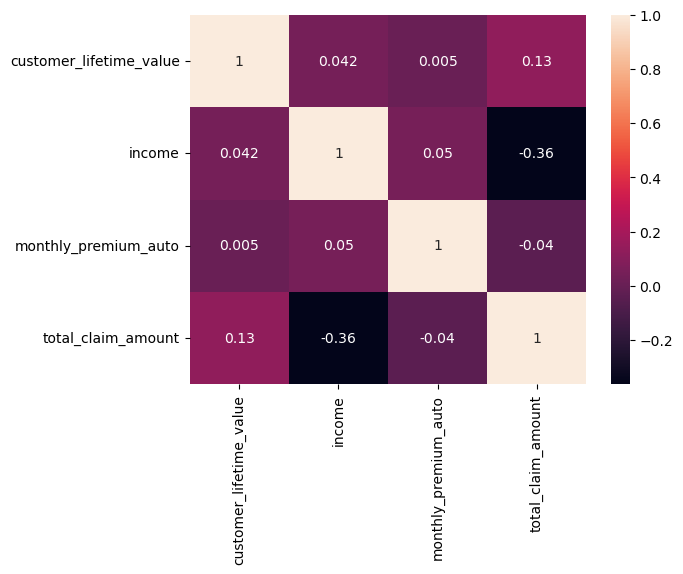

In [45]:
correlations_matrix = nums.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

Drop one of the two features that show a high correlation between them (greater than 0.9).
Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features
- I don't have a high correlation between any of them

# Lab | Customer Analysis Round 5

- X-y split. Remember that at this time you need the complete dataset, both numerical and categorical in the X features.
- X split into X_numerical and X_categorical
- Scaling (X_numerical).

In [46]:
# Creating my X y split for analysis and modeling 
y = clean3['total_claim_amount'] #lower case y 
X = clean3.drop(['total_claim_amount'], axis=1)


In [47]:
print(X.shape)
print(y.shape)

(1068, 10)
(1068,)


In [48]:
# Here I am splitting my numericals and categoricals in preparation for scaling and normalisation
X_nums = X.select_dtypes(include = np.number)
X_cats = X.select_dtypes(include = object)

In [49]:
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler # not using this one but just in case I change my mind later

In [50]:
# # Time to transform and normalize - and to check that it's worked. Here with MinMax
# transformer = MinMaxScaler().fit(X_nums)
# x_normalized = transformer.transform(X_nums)
# print(x_normalized.shape)
# x_normalized
# pd.DataFrame(x_normalized, columns=X_nums.columns)

(1068, 3)


,customer_lifetime_value,income,monthly_premium_auto
0,0.088586,0.000000,0.000935
1,0.193779,0.487865,0.001332
2,0.100450,0.000000,0.001275
3,0.059804,0.363715,0.000198
4,0.111319,0.629272,0.000227
...,...,...,...
1063,0.018788,0.386595,0.000482
1064,0.326031,0.632343,0.001162
1065,0.021986,0.160674,0.000765
1066,0.046694,0.795188,0.001502


In [97]:
X_nums.describe()

,customer_lifetime_value,income,monthly_premium_auto
count,1068.000000,1068.000000,1068.000000
mean,7936.902593,39315.411985,192.691948
std,6434.784103,30484.373979,1603.241719
min,2004.350700,0.000000,61.000000
25%,4034.079950,14072.000000,68.000000
50%,5881.742350,36226.000000,82.500000
75%,8962.871975,64668.750000,109.250000
max,58166.553500,99960.000000,35354.000000


In [81]:
# Here with standard
transformer = StandardScaler().fit(X_nums)
x_standardized = transformer.transform(X_nums)
print(x_standardized.shape)
pd.DataFrame(x_standardized, columns=X_nums.columns)

(1068, 3)


,customer_lifetime_value,income,monthly_premium_auto
0,-0.148850,-1.290295,-0.061587
1,0.769699,0.310192,-0.052850
2,-0.045250,-1.290295,-0.054098
3,-0.400174,-0.097092,-0.077811
4,0.049659,0.774090,-0.077187
...,...,...,...
1063,-0.758322,-0.022035,-0.071571
1064,1.924524,0.784165,-0.056594
1065,-0.730402,-0.763188,-0.065331
1066,-0.514649,1.318394,-0.049106


# Lab | Customer Analysis Round 6 & 7 & 8

**Round 6** 
- One Hot/Label Encoding (categorical).
- Concat DataFrames

**Linear Regression**
- Train-test split.
- Apply linear regression.

**Model Validation**

Description:
- R2.
- MSE.
- RMSE.
- MAE.

**Round 7** 

Modeling
Description:

Try to improve the linear regression model. Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model.

Some approaches you can try in this exercise:
- use the concept of multicollinearity and remove insignificant variables
- use a different method of scaling the numerical variables
- use a different ratio of train test split
- use the transformation on numerical columns which align it more towards a normal distribution

**Round 8** 

For this lab, we still keep using the file that you downloaded from the original link. The purpose now is to present a clean version of the entire process. You should have a notebook that runs from beginning to end with no errors in the correct order. The notebook should contain comments, decisions, and headings which clearly show the process from start to finish.


In [82]:
# Checking out my categories 
X_cats.head()

,customer,state,gender,education,policy_type,vehicle_class,clean_complaints
0,694,0,0,0,1,0,0
1,10,2,0,0,1,3,0
2,946,1,1,0,0,2,0
3,250,4,1,3,1,0,0
4,559,3,0,0,1,3,0


In [83]:
# This time I'll use the LabelEncoder because I dont' want to create lots of new columns but assign numeric values

from sklearn.preprocessing import LabelEncoder

labels_cats = pd.DataFrame()

for column in X_cats: 
    encoded_label = LabelEncoder().fit_transform(X_cats[column])
    labels_cats[column] = encoded_label

X_cats = labels_cats
X_cats.head()

,customer,state,gender,education,policy_type,vehicle_class,clean_complaints
0,694,0,0,0,1,0,0
1,10,2,0,0,1,3,0
2,946,1,1,0,0,2,0
3,250,4,1,3,1,0,0
4,559,3,0,0,1,3,0


In [84]:
X_cats.shape

(1068, 7)

In [85]:
y.shape

(1068,)

In [86]:
#I had to do this step or it would insert blank rows, making my data sets different sizes. I could and shhould have also done this after dropping the duplicates and doing the data cleaning
X_nums_reset = X_nums.reset_index(drop=True)
X_cats_reset = X_cats.reset_index(drop=True)
X = pd.concat([X_nums_reset, X_cats_reset], axis=1)

In [87]:
print(X.isnull().sum())

customer_lifetime_value    0
income                     0
monthly_premium_auto       0
customer                   0
state                      0
gender                     0
education                  0
policy_type                0
vehicle_class              0
clean_complaints           0
dtype: int64


In [ ]:
# Here I can test how dropping 
# X = X.drop('income', axis=1)
# X = X.drop('customer_lifetime_value', axis=1)
# X = X.drop('customer', axis=1)
# X = X.drop('gender', axis=1)
# X = X.drop('education', axis=1)
# X = X.drop('vehicle_class', axis=1)
# X = X.drop('clean_complaints', axis=1)

In [88]:
# Splitting my data in preparation for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [89]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(961, 10)
(107, 10)
(961,)
(107,)


In [90]:
from sklearn import linear_model

In [91]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [92]:
# In the next section, I'm validating my model using different metrics

In [93]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
print("R2 train score is:",r2_score(y_train, predictions))

predictions_test = lm.predict(X_test)
print("R2 test score is:",r2_score(y_test, predictions_test))

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
print("MSE is: ", mse)


rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
print("RMSE is: ",rmse)

print("RMSE/Ytest mean is: ",rmse/y_test.mean())

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
print("MAE-score is ", mean_absolute_error(y_test, predictions_test))

R2 train score is: 0.17588052626784623
R2 test score is: 0.23579483951369495
MSE is:  58107.682737706324
RMSE is:  241.05535202045675
RMSE/Ytest mean is:  0.614727427154307
MAE-score is  182.43930809852301


- use the concept of multicollinearity and remove insignificant variables
- use a different method of scaling the numerical variables
- use a different ratio of train test split
- use the transformation on numerical columns which align it more towards a normal distribution

In [95]:
# I increased the training data and the result became marginally worse for the training but significantly better for the test

In [ ]:
# Changing the scaling from minmax to standard type made very little difference